In [8]:
%pip install genism
import gensim
from gensim import corpora
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

/usr/local/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=584) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement genism (from versions: none)
ERROR: No matching distribution found for genism
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
import pandas as pd
df = pd.read_csv('./data/clean_titles.csv')
df.head()

,title,link,date,source,country,language,translated_title,number_of_characters_title,number_of_words_title,day_of_week,...,is_holiday,source_type,final_redirected_URL,domain_of_URL,subdomain_of_URL,URL_depth,top_level_domain,url_length,author,cleaned_title
0,Kann künstliche Intelligenz Smalltalk ersetzen...,https://news.google.com/rss/articles/CBMiY2h0d...,2023-11-12,Blick,US,de,Can artificial intelligence replace small talk...,47,8,Sunday,...,False,News Outlet,https://www.blick.ch/schweiz/linguistik-profes...,www.blick.ch,www,2,ch,99,[],Can artificial intelligence replace small talk?
1,Lidé se snadněji svěří chatbotům. Emocionální ...,https://news.google.com/rss/articles/CBMidmh0d...,2023-11-12,iDNES.cz,US,cs,People trust chatbots more easily. Emotional A...,72,13,Sunday,...,False,Other,https://www.idnes.cz/zpravy/domaci/ai-umela-in...,www.idnes.cz,www,3,cz,118,['Autor'],People trust chatbots more easily. Emotional A...
2,¿Cómo implementar la IA en el comercio online?...,https://news.google.com/rss/articles/CBMicmh0d...,2023-11-12,RRHH Digital,US,es,How to implement AI in online commerce? - Digi...,43,10,Sunday,...,False,News Outlet,https://www.rrhhdigital.com/secciones/tecnolog...,www.rrhhdigital.com,www,5,com,114,[],How to implement AI in online commerce?
3,"Kontrolle von KI: Vorsicht, KI! | ZEIT ONLINE ...",https://news.google.com/rss/articles/CBMiXWh0d...,2023-11-12,ZEIT ONLINE English,US,de,"Controlling AI: Be careful, AI! | ZEIT ONLINE ...",56,12,Sunday,...,False,Other,https://www.zeit.de/zeit-wissen/2023/06/kuenst...,www.zeit.de,www,4,de,93,[],"Controlling AI: Be careful, AI! | ZEIT ONLINE"
4,Los consejos para ganar la lotería de la Intel...,https://news.google.com/rss/articles/CBMiXWh0d...,2023-11-12,C5N,US,es,Tips to win the Artificial Intelligence lotter...,45,9,Sunday,...,False,Other,https://www.c5n.com/sociedad/los-consejos-gana...,www.c5n.com,www,2,com,93,[],Tips to win the Artificial Intelligence lottery


In [10]:
%pip install nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


def preprocess_text(text):
    tokens = word_tokenize(text)
    # Remove punctuation and numbers
    table = str.maketrans('', '', string.punctuation + string.digits)
    tokens = [word.translate(table) for word in tokens]
    tokens = [token for token in tokens if token.lower() not in ['artificial', 'ai', 'intelligence'] and token not in stop_words and token not in string.punctuation]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [word for word in tokens if len(word) > 2]
    return tokens

/usr/local/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=584) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

processed_headlines = [preprocess_text(headline.lower()) for headline in df['cleaned_title']]

# Create dictionary and corpus
dictionary = corpora.Dictionary(processed_headlines)
corpus = [dictionary.doc2bow(tokens) for tokens in processed_headlines]

# LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
for idx, topic in lda_model.print_topics():
    print(f'Topic {idx + 1}: {topic}')

dominant_topics = []
# Get the most dominant topic for each headline
for i, headline in enumerate(processed_headlines):
    headline = str(headline)
    bow = dictionary.doc2bow(preprocess_text(headline))
    topic = lda_model.get_document_topics(bow)
    dominant_topic = sorted(topic, key=lambda x: x[1], reverse=True)[0]
    dominant_topics.append(dominant_topic)
    
df['dominant_topic'] = dominant_topics
df.to_csv('data/clean_titles.csv', index=False)

[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topic 1: 0.027*"model" + 0.020*"generative" + 0.017*"new" + 0.015*"language" + 0.010*"google" + 0.009*"tool" + 0.009*"meta" + 0.008*"launch" + 0.008*"platform" + 0.007*"large"
Topic 2: 0.012*"model" + 0.011*"new" + 0.010*"gpt" + 0.010*"openai" + 0.009*"generative" + 0.009*"market" + 0.008*"global" + 0.008*"tech" + 0.008*"company" + 0.007*"china"
Topic 3: 0.010*"stock" + 0.010*"gpt" + 0.010*"generative" + 0.009*"chatbot" + 0.008*"could" + 0.007*"chatgpt" + 0.007*"better" + 0.006*"chat" + 0.006*"top" + 0.006*"using"
Topic 4: 0.027*"google" + 0.017*"generative" + 0.015*"chatbot" + 0.008*"bard" + 0.007*"new" + 0.007*"gpt" + 0.006*"chat" + 0.006*"search" + 0.006*"use" + 0.006*"change"
Topic 5: 0.031*"chatbot" + 0.016*"generative" + 0.013*"chatgpt" + 0.012*"new" + 0.011*"launch" + 0.010*"future" + 0.008*"robot" + 0.008*"use" + 0.007*"help" + 0.007*"know"


'''
Topic 0: 0.013*"generative" + 0.010*"new" + 0.007*"help" + 0.007*"launch" + 0.005*"tool" + 0.005*"aipowered" + 0.005*"make" + 0.005*"enterprise" + 0.005*"chatbots" + 0.005*"platform"
Topic 1: 0.060*"artificial" + 0.058*"intelligence" + 0.009*"generative" + 0.009*"chatbot" + 0.007*"musk" + 0.006*"human" + 0.006*"use" + 0.005*"risk" + 0.005*"elon" + 0.005*"say"
Topic 2: 0.031*"artificial" + 0.030*"intelligence" + 0.011*"new" + 0.010*"chatbot" + 0.010*"generative" + 0.010*"stock" + 0.009*"gpt" + 0.007*"launch" + 0.007*"chat" + 0.007*"expert"
Topic 3: 0.022*"model" + 0.012*"gpt" + 0.010*"new" + 0.009*"chatbot" + 0.009*"language" + 0.008*"open" + 0.008*"llm" + 0.007*"generative" + 0.007*"large" + 0.006*"market"
Topic 4: 0.025*"generative" + 0.012*"google" + 0.011*"meta" + 0.011*"new" + 0.010*"intelligence" + 0.009*"chatbot" + 0.009*"artificial" + 0.008*"tool" + 0.007*"launch" + 0.007*"model"
'''

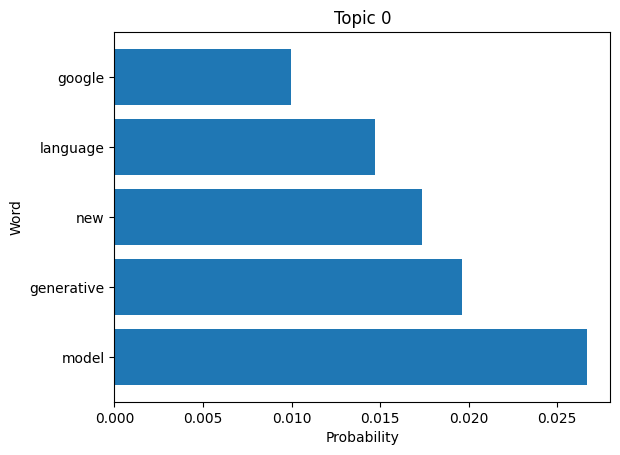

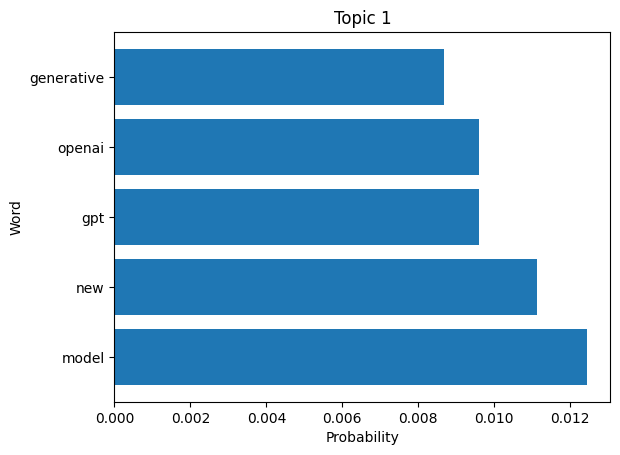

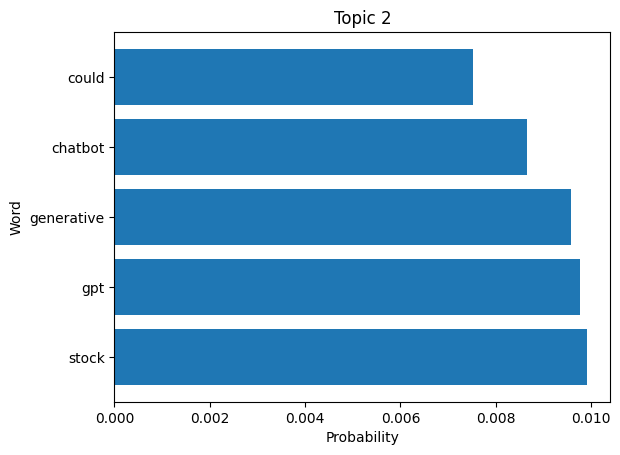

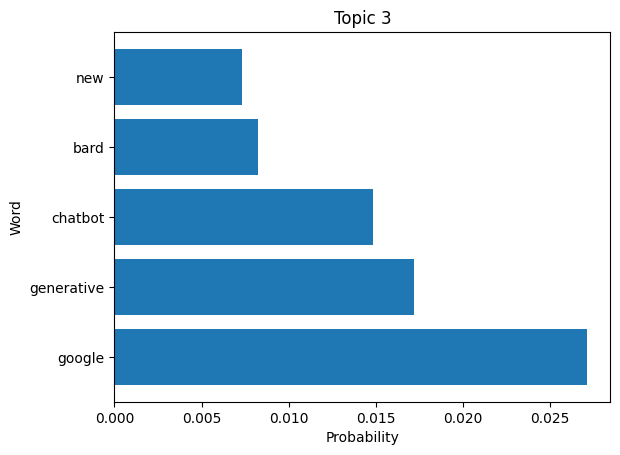

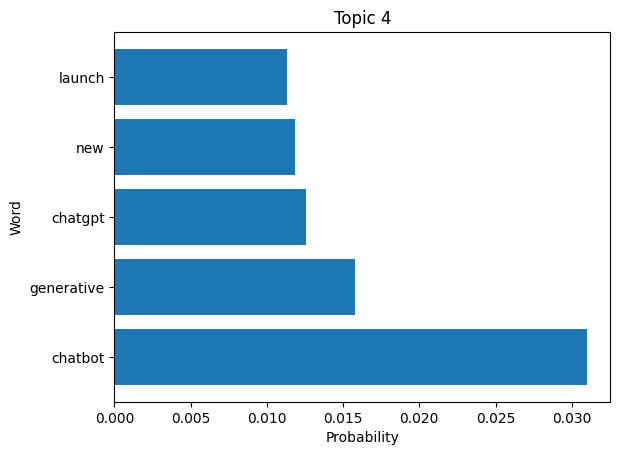

In [12]:
import matplotlib.pyplot as plt

def visualize_topics(lda_model):
    topics = lda_model.show_topics(num_topics=10, num_words=5, formatted=False)
    for topic_idx, topic_words in topics:
        words = [word[0] for word in topic_words]
        probabilities = [word[1] for word in topic_words]
        plt.barh(words, probabilities)
        plt.title(f"Topic {topic_idx}")
        plt.xlabel("Probability")
        plt.ylabel("Word")
        plt.show()

# Visualize the topics
visualize_topics(lda_model)


In [13]:
%pip install pyLDAvis

import pandas as pd
import pyLDAvis
import pyLDAvis.gensim

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=584) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/home/vscode/.local/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
/home/vscode/.local/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
/home/vscode/.local/lib/python3.12/site-packages/joblib/_utils.py:39: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n
/home/vscode/.local/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
/home/vscode/.local/lib/python3.12/site-packages/joblib/_utils.py:39: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value i

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.103730 -0.068314       1        1  22.652837
4     -0.078265 -0.025400       2        1  20.918489
3     -0.076600 -0.164046       3        1  19.359676
1      0.190832  0.086348       4        1  18.766181
2     -0.139696  0.171412       5        1  18.302817, topic_info=         Term        Freq       Total Category  logprob  loglift
90      model  514.000000  514.000000  Default  30.0000  30.0000
32     google  461.000000  461.000000  Default  29.0000  29.0000
163   chatbot  672.000000  672.000000  Default  28.0000  28.0000
206  language  205.000000  205.000000  Default  27.0000  27.0000
161     stock  112.000000  112.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
412      data   45.338214  191.524492   Topic5  -5.5128   0.2572
8        help   44.424122  189.870171   Topic5  -5.5332   0.2456
455  business   40.003740  125.964563   Topic5  -5.6380   0.5511
4    chatbots   41.674055  222.895005   Topic5  -5.5971   0.0213
27     launch   42.908149  370.423482   Topic5  -5.5679  -0.4575

[326 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3554      1  0.972872   across
1090      1  0.134862      act
1090      4  0.836142      act
2438      2  0.977825   action
2403      4  0.989170      age
...     ...       ...      ...
972       5  0.972261  worried
454       3  0.958731    worry
1801      1  0.990783    write
2489      5  0.969132   writer
1391      3  0.990140     zoom

[447 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 4, 2, 3])

/usr/local/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=584) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


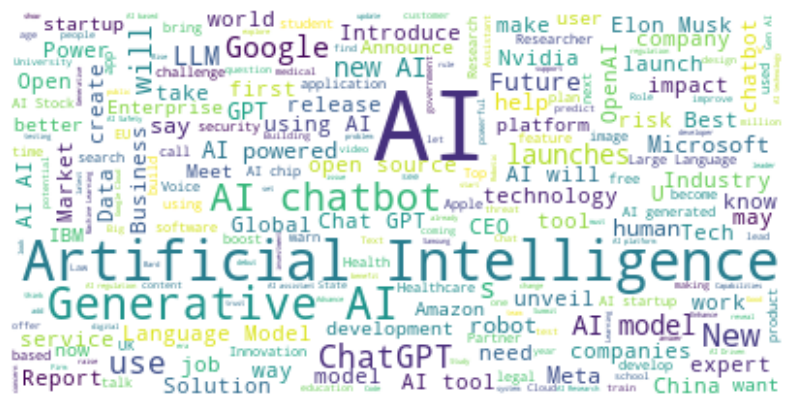

In [14]:
%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
sw = STOPWORDS


text = " ".join(i for i in df['cleaned_title'])
wc2 = WordCloud(stopwords=sw, background_color="white", max_words=300).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")
plt.show()